In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AAPL.csv")

In [3]:
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [4]:
cl = df["close"]

In [5]:
cl

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

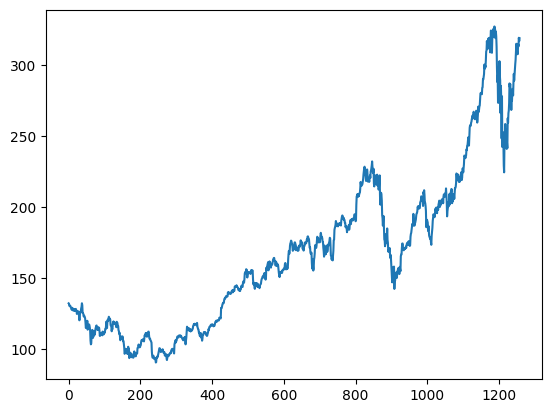

In [6]:
plt.plot(cl)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
sc = MinMaxScaler(feature_range = (0,1))
cl = sc.fit_transform(np.array(cl).reshape(-1,1))

In [10]:
train_data = cl[0:int(len(cl)*0.65), :]
test_data = cl[int(len(cl)*0.65):len(cl),:]

In [11]:
len(test_data)

441

In [12]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [13]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [14]:
(X_train.shape)

(716, 100)

In [15]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10, batch_size=64, verbose=1)

Epoch 1/10
12/12 [==============================] - 20s 581ms/step - loss: 0.0175 - val_loss: 0.0583
Epoch 2/10
12/12 [==============================] - 4s 343ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 3/10
12/12 [==============================] - 4s 311ms/step - loss: 9.5811e-04 - val_loss: 0.0061
Epoch 4/10
12/12 [==============================] - 4s 333ms/step - loss: 8.1313e-04 - val_loss: 0.0042
Epoch 5/10
12/12 [==============================] - 4s 359ms/step - loss: 8.3228e-04 - val_loss: 0.0049
Epoch 6/10
12/12 [==============================] - 4s 368ms/step - loss: 6.9145e-04 - val_loss: 0.0045
Epoch 7/10
12/12 [==============================] - 4s 324ms/step - loss: 6.4321e-04 - val_loss: 0.0058
Epoch 8/10
12/12 [==============================] - 4s 334ms/step - loss: 7.2368e-04 - val_loss: 0.0053
Epoch 9/10
12/12 [==============================] - 4s 331ms/step - loss: 7.4348e-04 - val_loss: 0.0040
Epoch 10/10
12/12 [==============================] - 4s 326ms/step - lo

In [20]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 1s 70ms/step


In [22]:
train_predict

array([[0.09377357],
       [0.09334128],
       [0.0929769 ],
       [0.09274677],
       [0.09267551],
       [0.09281602],
       [0.09328666],
       [0.09399981],
       [0.09485863],
       [0.09593701],
       [0.09728509],
       [0.09886353],
       [0.100671  ],
       [0.10271554],
       [0.10494696],
       [0.10727128],
       [0.10961702],
       [0.11191115],
       [0.11398365],
       [0.1157288 ],
       [0.11709502],
       [0.11797421],
       [0.11840553],
       [0.11843272],
       [0.11822949],
       [0.11795785],
       [0.11772975],
       [0.11755492],
       [0.1174706 ],
       [0.11746211],
       [0.11750786],
       [0.11760609],
       [0.1177201 ],
       [0.11779497],
       [0.11777075],
       [0.11774423],
       [0.11774355],
       [0.11778048],
       [0.1177762 ],
       [0.11770995],
       [0.1174831 ],
       [0.117038  ],
       [0.11630511],
       [0.115306  ],
       [0.11401062],
       [0.11234892],
       [0.11037034],
       [0.108

In [23]:
#Transformback to original form
train_predict1 = sc.inverse_transform(train_predict)
test_predict1 = sc.inverse_transform(test_predict)

In [25]:
y_train, train_predict1

(array([0.0873934 , 0.09030651, 0.09891919, 0.09887697, 0.10622309,
        0.1213375 , 0.10529427, 0.10221228, 0.12213966, 0.12745926,
        0.1231107 , 0.1302035 , 0.13607194, 0.13366546, 0.1291058 ,
        0.12969687, 0.12762813, 0.1115849 , 0.10879845, 0.1071519 ,
        0.09288187, 0.10062906, 0.09858144, 0.11378029, 0.12007093,
        0.12226632, 0.11572237, 0.12049312, 0.1169045 , 0.11597568,
        0.11804441, 0.11399139, 0.10951617, 0.10495651, 0.1211264 ,
        0.11795998, 0.11774888, 0.10672971, 0.10905176, 0.09642827,
        0.09347294, 0.08507135, 0.08865997, 0.07869628, 0.06624166,
        0.07173014, 0.07130795, 0.07713417, 0.07468547, 0.06957697,
        0.07768302, 0.07168792, 0.0629908 , 0.06337077, 0.05222494,
        0.04373892, 0.02579583, 0.027949  , 0.03457739, 0.04061471,
        0.02976442, 0.03875707, 0.02866672, 0.02668243, 0.02723128,
        0.02516254, 0.04677869, 0.03841932, 0.04074137, 0.01300346,
        0.01583214, 0.02955332, 0.02571139, 0.01

In [36]:
y_train.shape, train_predict.shape

((716,), (716, 1))

In [39]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(sc.inverse_transform(y_train.reshape(y_train.shape[0],1)),sc.inverse_transform(train_predict)))

5.85654538109225

In [40]:
math.sqrt(mean_squared_error(sc.inverse_transform(y_test.reshape(y_test.shape[0],1)),sc.inverse_transform(test_predict)))

14.570169958697193

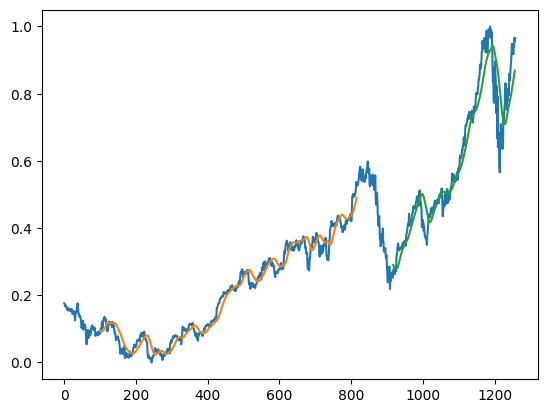

In [41]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(cl)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(cl)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(cl)-1, :] = test_predict

# plot baseline and predictions
plt.plot(cl)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [44]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [46]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [50]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        
        x_input=np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

# print(lst_output)

0 day output [[0.86661536]]
1 day output [[0.86643183]]
2 day output [[0.8662511]]
3 day output [[0.8660732]]
4 day output [[0.8658982]]
5 day output [[0.86572593]]
6 day output [[0.8655566]]
7 day output [[0.8653899]]
8 day output [[0.8652258]]
9 day output [[0.8650643]]
10 day output [[0.86490536]]
11 day output [[0.8647492]]
12 day output [[0.8645955]]
13 day output [[0.8644442]]
14 day output [[0.86429524]]
15 day output [[0.8641485]]
16 day output [[0.86400443]]
17 day output [[0.86386245]]
18 day output [[0.86372286]]
19 day output [[0.8635851]]
20 day output [[0.86344993]]
21 day output [[0.8633168]]
22 day output [[0.86318564]]
23 day output [[0.86305684]]
24 day output [[0.86292994]]
25 day output [[0.86280507]]
26 day output [[0.86268216]]
27 day output [[0.8625613]]
28 day output [[0.862442]]
29 day output [[0.8623247]]


In [51]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

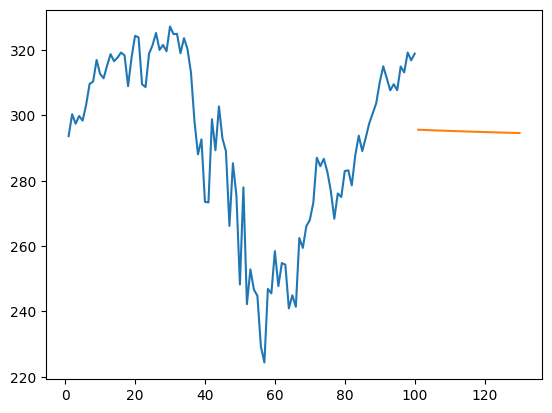

In [55]:
plt.plot(day_new,sc.inverse_transform(cl[1158:]))
plt.plot(day_pred,sc.inverse_transform(lst_output))

In [56]:
sc.inverse_transform(lst_output)

array([[295.60651299],
       [295.5630438 ],
       [295.52023816],
       [295.47809606],
       [295.43664574],
       [295.39584485],
       [295.35573573],
       [295.31624781],
       [295.27738108],
       [295.23913553],
       [295.20148294],
       [295.1644939 ],
       [295.12808369],
       [295.09225232],
       [295.05697155],
       [295.02221314],
       [294.98809004],
       [294.95446107],
       [294.92139681],
       [294.88877022],
       [294.85675069],
       [294.82521118],
       [294.79415167],
       [294.76364277],
       [294.73358564],
       [294.70400852],
       [294.6748973 ],
       [294.64626608],
       [294.61801605],
       [294.59023191]])